#Below is the name of each file and a brief explanation of each column
**application_record.csv**		

---


Feature name            :	Explanation               :	Remarks

---



ID	Client              : number	

---


CODE_GENDER :	Gender	

---


FLAG_OWN_CAR :	Is there a car	

---


FLAG_OWN_REALTY    :	Is there a property	

---


CNT_CHILDREN :	Number of children	

---


AMT_INCOME_TOTAL :	Annual income	

---


NAME_INCOME_TYPE :	Income category	

---


NAME_EDUCATION_TYPE :	Education level	

---


NAME_FAMILY_STATUS :	Marital status	

---


NAME_HOUSING_TYPE :	Way of living	

---


DAYS_BIRTH :	Birthday :	Count backwards from current day (0), -1 means yesterday

---


DAYS_EMPLOYED	: Start date of employment :	Count backwards from current day(0). If positive, it means the person currently unemployed.

---


FLAG_MOBIL :	Is there a mobile phone	

---


FLAG_WORK_PHONE :	Is there a work phone	

---


FLAG_PHONE :	Is there a phone	

---


FLAG_EMAIL :	Is there an email	

---


OCCUPATION_TYPE :	Occupation	

---


CNT_FAM_MEMBERS :	Family size	

---
**credit_record.csv**		

---


Feature : name	 : Explanation	Remarks

---


ID	Client number	

---


MONTHS_BALANCE :	Record month :	The month of the extracted data is the starting point, backwards, 0 is the current month, -1 is the previous month, and so on

---


STATUS	Status:	0: 1-29 days past due 1: 30-59 days past due 2: 60-89 days overdue 3: 90-119 days overdue 4: 120-149 days overdue 5: Overdue or bad debts, write-offs for more than 150 days C: paid off that month X: No loan for the month



In [60]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder


In [61]:
!git clone https://github.com/Phunbie/credit-card-approval-prediction.git

fatal: destination path 'credit-card-approval-prediction' already exists and is not an empty directory.


In [62]:
# Load in the dataset
app_df = pd.read_csv('/content/credit-card-approval-prediction/Data/application_record.csv')
credit_df   = pd.read_csv('/content/credit-card-approval-prediction/Data/credit_record.csv')

In [63]:
credit_df.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [64]:
app_df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [65]:
app_df.shape

(438557, 18)

In [66]:
app_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [67]:
credit_df.shape

(1048575, 3)

In [68]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [69]:
app_df.describe()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
count,4.385570e+05,438557.000000,4.385570e+05,438557.000000,438557.000000,438557.0,438557.000000,438557.000000,438557.000000,438557.000000
mean,6.022176e+06,0.427390,1.875243e+05,-15997.904649,60563.675328,1.0,0.206133,0.287771,0.108207,2.194465
std,5.716370e+05,0.724882,1.100869e+05,4185.030007,138767.799647,0.0,0.404527,0.452724,0.310642,0.897207
min,5.008804e+06,0.000000,2.610000e+04,-25201.000000,-17531.000000,1.0,0.000000,0.000000,0.000000,1.000000
25%,5.609375e+06,0.000000,1.215000e+05,-19483.000000,-3103.000000,1.0,0.000000,0.000000,0.000000,2.000000
50%,6.047745e+06,0.000000,1.607805e+05,-15630.000000,-1467.000000,1.0,0.000000,0.000000,0.000000,2.000000
75%,6.456971e+06,1.000000,2.250000e+05,-12514.000000,-371.000000,1.0,0.000000,1.000000,0.000000,3.000000
max,7.999952e+06,19.000000,6.750000e+06,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000


In [70]:
# Checking for missing values
app_df.isnull().sum()

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134203
CNT_FAM_MEMBERS             0
dtype: int64

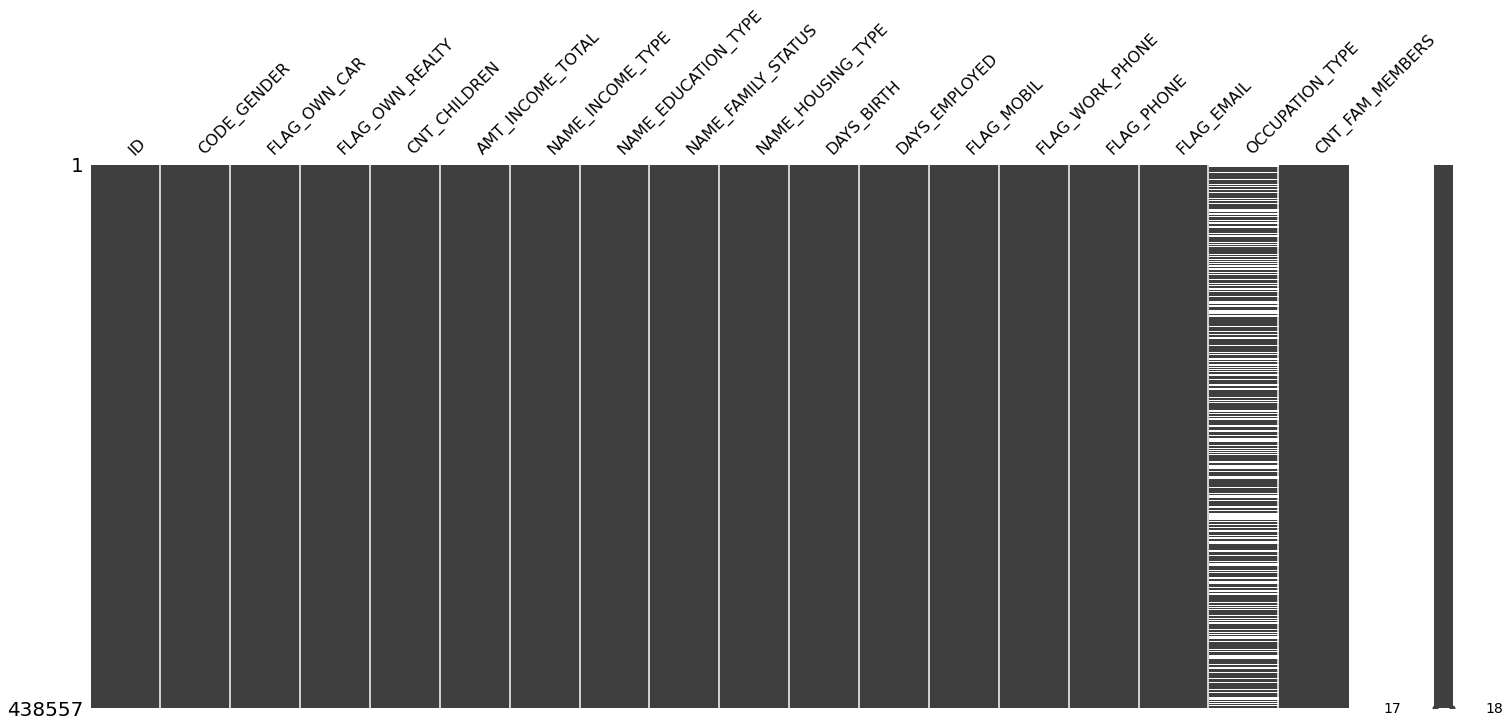

In [71]:
# Visualising missing values
import missingno as msno

msno.matrix(app_df)

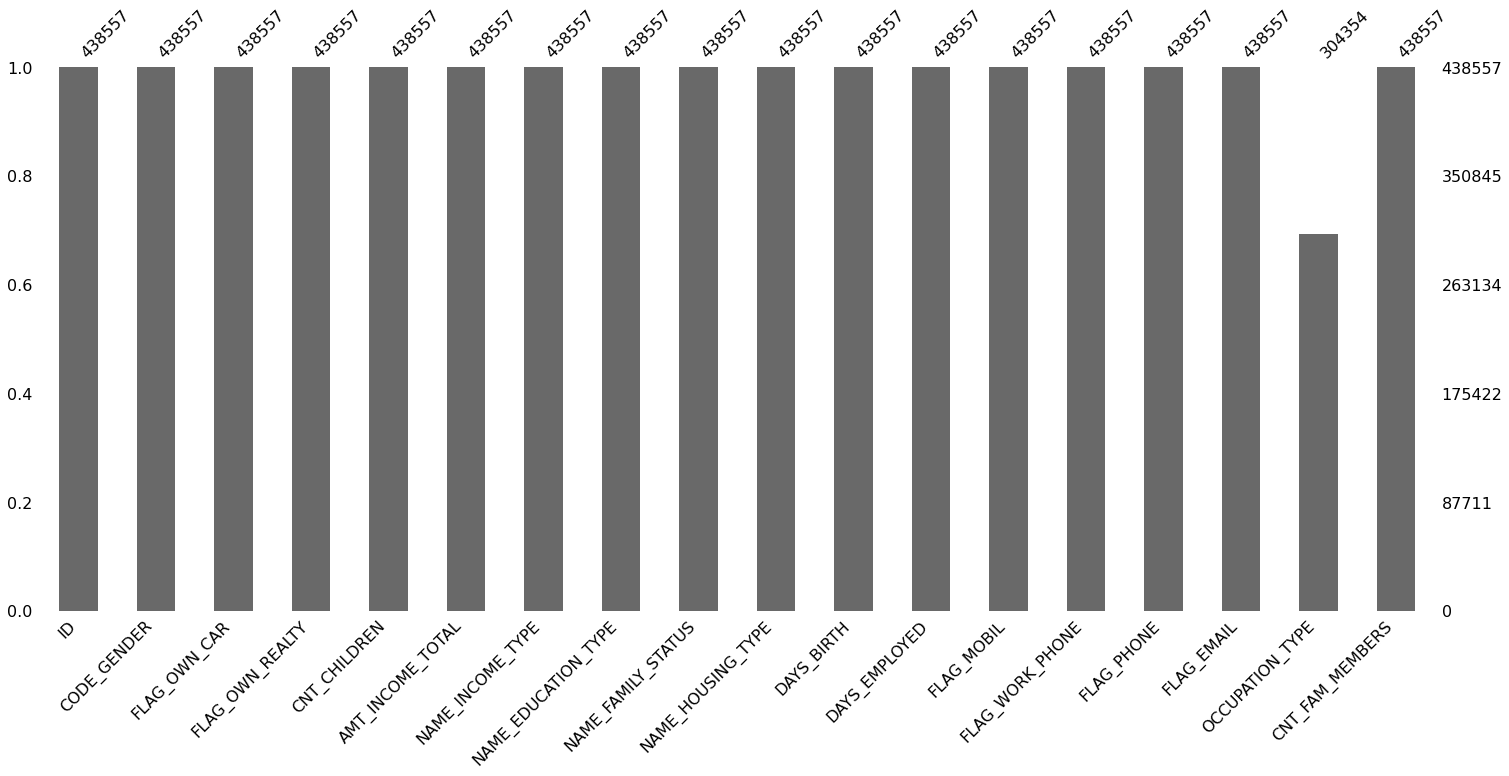

In [72]:
# More accurate way to visualise missing values
msno.bar(app_df)

In [73]:
# Drop the column with missing values

app_df = app_df.drop('OCCUPATION_TYPE', axis= 1)

In [74]:
app_df.isna().sum()

ID                     0
CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
DAYS_BIRTH             0
DAYS_EMPLOYED          0
FLAG_MOBIL             0
FLAG_WORK_PHONE        0
FLAG_PHONE             0
FLAG_EMAIL             0
CNT_FAM_MEMBERS        0
dtype: int64

### From both dataset, we realise that the column 'ID' seems to exist in both but are of different values. We need to solve that mystery. Keep that in mind!

In [75]:
print(len(app_df['ID']));
print(len(credit_df['ID']))

438557
1048575


### Notice the difference right?

In [76]:
# This gives us the number of unique values in the dataset
len(app_df['ID'].unique())

438510

In [77]:
# This shows the number of duplicate ID's that exist in the dataset
len(app_df['ID']) - len(app_df['ID'].unique())

47

In [78]:
# Dropping duplicate entries from ID column to further clean the data
# An ideal record should never have people with the same ID
app_df = app_df.drop_duplicates('ID', keep='last')

In [79]:
# if you compare the initial loaded dataframe and the new one, you'd realise that it is short of 47 entries
# it means our new datadrame is devoid of duplicate ID's
app_df.shape

(438510, 17)

In [80]:
len(credit_df['ID']) - len(credit_df['ID'].unique())

1002590

In [81]:
credit_df = credit_df.drop_duplicates('ID', keep='last')

In [82]:
# # Checking Non-Numerical Columns
# cat_columns = app_df.columns[(app_df.dtypes =='object').values].tolist()
# cat_columns

## Separate Object datatypes from Numerical datatypes

In [83]:
ot = pd.DataFrame(app_df.dtypes =='object').reset_index()
object_type = ot[ot[0] == True]['index']
object_type
# object_dtype = app_df.dtypes[app_df.dtypes == 'object'].index

1            CODE_GENDER
2           FLAG_OWN_CAR
3        FLAG_OWN_REALTY
6       NAME_INCOME_TYPE
7    NAME_EDUCATION_TYPE
8     NAME_FAMILY_STATUS
9      NAME_HOUSING_TYPE
Name: index, dtype: object

## Let us do more wrangling to the categorical datatypes 😎

In [84]:
# we need to determine how to encode the categorical dataset
# As a result, we need to inspect them all
for i in app_df.columns[(app_df.dtypes =='object').values].tolist():
    print(i,'\n')
    print(app_df[i].value_counts())
    print('\n')
    


CODE_GENDER 

F    294412
M    144098
Name: CODE_GENDER, dtype: int64


FLAG_OWN_CAR 

N    275428
Y    163082
Name: FLAG_OWN_CAR, dtype: int64


FLAG_OWN_REALTY 

Y    304043
N    134467
Name: FLAG_OWN_REALTY, dtype: int64


NAME_INCOME_TYPE 

Working                 226087
Commercial associate    100739
Pensioner                75483
State servant            36184
Student                     17
Name: NAME_INCOME_TYPE, dtype: int64


NAME_EDUCATION_TYPE 

Secondary / secondary special    301789
Higher education                 117509
Incomplete higher                 14849
Lower secondary                    4051
Academic degree                     312
Name: NAME_EDUCATION_TYPE, dtype: int64


NAME_FAMILY_STATUS 

Married                 299798
Single / not married     55268
Civil marriage           36524
Separated                27249
Widow                    19671
Name: NAME_FAMILY_STATUS, dtype: int64


NAME_HOUSING_TYPE 

House / apartment      393788
With parents            19074


In [85]:
credit_df.STATUS.value_counts()

0    26802
X    18737
C      432
1       13
5        1
Name: STATUS, dtype: int64

In [86]:
# #Converting all Non-Numerical Columns to Numerical
# for col in cat_columns:
#         globals()['LE_{}'.format(col)] = LabelEncoder()
#         final_df[col] = globals()['LE_{}'.format(col)].fit_transform(app_df[col])
# app_df.head()

In [87]:
le = LabelEncoder()
for x in app_df:
    if app_df[x].dtypes=='object':
        app_df[x] = le.fit_transform(app_df[x])
# This transforms all the object/numerocal data columns into numerical data columns


#Let us try and merge both dataframe

In [88]:
len(app_df)

438510

In [90]:
merged_df = pd.merge(app_df,credit_df, on='ID', how='left')

In [91]:
len(merged_df)

438510

In [92]:
merged_df.head(15)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,1,1,0,0,2.0,-15.0,X
1,5008805,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,1,1,0,0,2.0,-14.0,X
2,5008806,1,1,1,0,112500.0,4,4,1,1,-21474,-1134,1,0,0,0,2.0,-29.0,X
3,5008808,0,0,1,0,270000.0,0,4,3,1,-19110,-3051,1,0,1,1,1.0,-4.0,X
4,5008809,0,0,1,0,270000.0,0,4,3,1,-19110,-3051,1,0,1,1,1.0,-26.0,X
5,5008810,0,0,1,0,270000.0,0,4,3,1,-19110,-3051,1,0,1,1,1.0,-26.0,X
6,5008811,0,0,1,0,270000.0,0,4,3,1,-19110,-3051,1,0,1,1,1.0,-38.0,X
7,5008812,0,0,1,0,283500.0,1,1,2,1,-22464,365243,1,0,0,0,1.0,-20.0,X
8,5008813,0,0,1,0,283500.0,1,1,2,1,-22464,365243,1,0,0,0,1.0,-16.0,X
9,5008814,0,0,1,0,283500.0,1,1,2,1,-22464,365243,1,0,0,0,1.0,-17.0,X


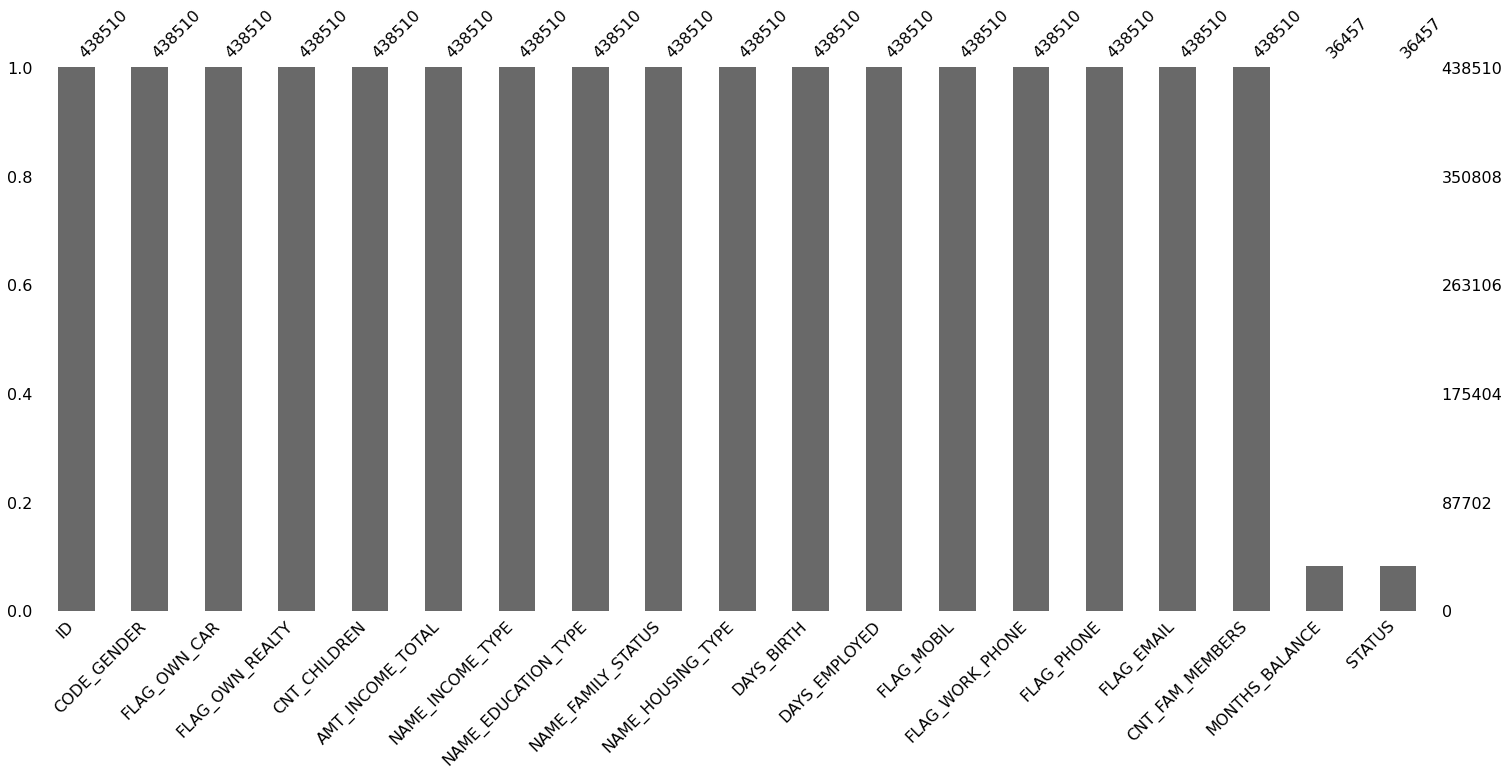

In [94]:
msno.bar(merged_df)